Using the data collected from existing customers, a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
bkData=pd.read_csv("bank-full.csv")

In [258]:
bkData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [259]:
bkData.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [260]:
bkData.shape

(45211, 17)

In [261]:
bkData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [262]:
bkData.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [263]:
bkData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [264]:
bkData["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [265]:
for i in bkData.columns[bkData.dtypes=='object']:
    
    print(i) 
    print(bkData[i].value_counts)
    print()
    print()

job
<bound method IndexOpsMixin.value_counts of 0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object>


marital
<bound method IndexOpsMixin.value_counts of 0         married
1          single
2         married
3         married
4          single
           ...   
45206     married
45207    divorced
45208     married
45209     married
45210     married
Name: marital, Length: 45211, dtype: object>


education
<bound method IndexOpsMixin.value_counts of 0         tertiary
1        secondary
2        secondary
3          unknown
4          unknown
           ...    
45206     tertiary
45207      primary
45208    secondary
45209    secondary
45210    secondary
Name: education, Length: 45211, dtype: object>


default
<bound method IndexOpsMixin.value_counts of 0     

In [266]:
bkData.skew()

C:\Users\Shan\AppData\Local\Temp/ipykernel_14484/219236426.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bkData.skew()


age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

c:\users\shan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


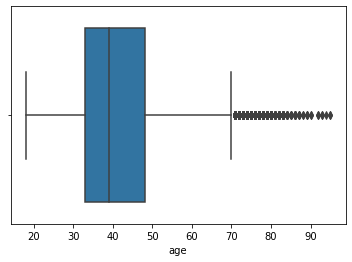

In [267]:
sns.boxplot(bkData['age'])
plt.show()

outliers above 70

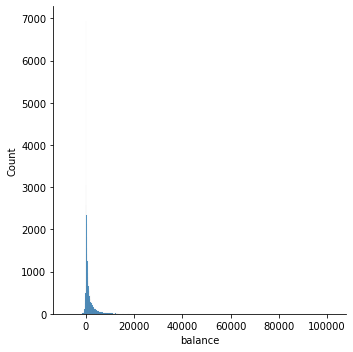

In [268]:
sns.displot(bkData['balance'])
plt.show()

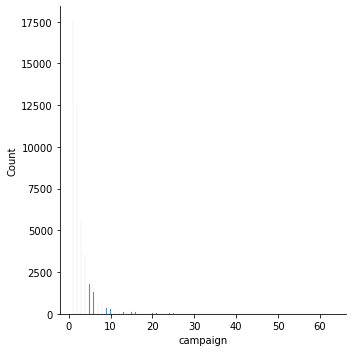

In [269]:
sns.displot(bkData['campaign'])
plt.show()

In [270]:
bkData['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [271]:
bkData.shape

(45211, 17)

In [272]:
bkData.drop(['poutcome'],axis=1,inplace=True)

In [273]:
bkData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no


In [274]:
bkData['Target'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

In [275]:
bkData['duration'].value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: duration, Length: 1573, dtype: int64

In [276]:
bkData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no


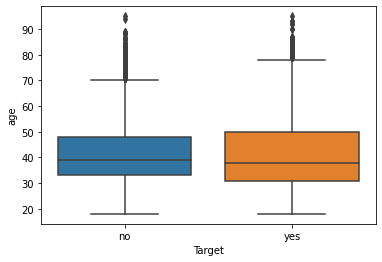

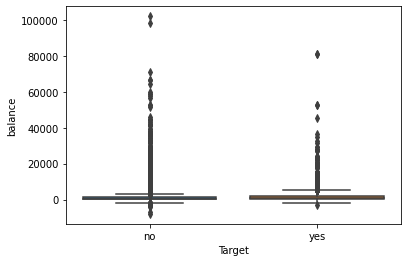

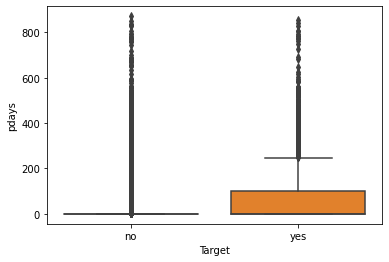

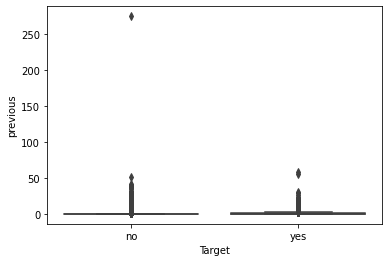

In [277]:
for i in ['age','balance','pdays','previous']:
    sns.boxplot(x='Target',y=i,data=bkData)
    plt.show()

In [278]:
np.round(bkData.groupby(['Target']).mean(),1)

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,40.8,1303.7,15.9,221.2,2.8,36.4,0.5
yes,41.7,1804.3,15.2,537.3,2.1,68.7,1.2


In [279]:
pd.crosstab(bkData['job'],bkData['Target'],normalize='index').sort_values(by='yes',ascending=False)

Target,no,yes
job,,
student,0.713220,0.286780
retired,0.772085,0.227915
unemployed,0.844973,0.155027
management,0.862444,0.137556
admin.,0.877973,0.122027
self-employed,0.881571,0.118429
unknown,0.881944,0.118056
technician,0.889430,0.110570
services,0.911170,0.088830


In [280]:
pd.crosstab(bkData['marital'],bkData['Target'],normalize='index').sort_values(by='yes',ascending=False)

Target,no,yes
marital,,
single,0.850508,0.149492
divorced,0.880545,0.119455
married,0.898765,0.101235


In [281]:
pd.crosstab(bkData['education'],bkData['Target'],normalize='index').sort_values(by='yes',ascending=False)

Target,no,yes
education,,
tertiary,0.849936,0.150064
unknown,0.864297,0.135703
secondary,0.894406,0.105594
primary,0.913735,0.086265


In [282]:
pd.crosstab(bkData['housing'],bkData['Target'],normalize='index').sort_values(by='yes',ascending=False)

Target,no,yes
housing,,
no,0.832976,0.167024
yes,0.923000,0.077000


In [283]:
pd.crosstab(bkData['loan'],bkData['Target'],normalize='index').sort_values(by='yes',ascending=False)

Target,no,yes
loan,,
no,0.873443,0.126557
yes,0.933186,0.066814


In [284]:
pd.crosstab(bkData['contact'],bkData['Target'],normalize='index').sort_values(by='yes',ascending=False)

Target,no,yes
contact,,
cellular,0.850811,0.149189
telephone,0.865795,0.134205
unknown,0.959293,0.040707


In [285]:
pd.crosstab(bkData['month'],bkData['Target'],normalize='index').sort_values(by='yes',ascending=False)

Target,no,yes
month,,
mar,0.480084,0.519916
dec,0.532710,0.467290
sep,0.535406,0.464594
oct,0.562331,0.437669
apr,0.803206,0.196794
feb,0.833522,0.166478
aug,0.889867,0.110133
jun,0.897772,0.102228
nov,0.898489,0.101511


In [286]:
#Binnning

X=bkData.drop('duration',axis=1,inplace=True)


In [287]:
bin_edges=[-8020,0,72,448,1428,102128]
# first value is min value -1 of the column and last value is max +1  of the column, so that all values are included
# you can choose middle value on your own or select 25th, 50th and 75th percentile value
bin_names=['very low','low','medium','high','very high']
# Names of each bin or category
bkData['balance'] = pd.cut(bkData['balance'],bin_edges,labels=bin_names)

In [288]:
#Binning Campaign

bin_edges=[0,2,3,4,564]
# first value is min value -1 of the column and last value is max +1  of the column, so that all values are included
# you can choose middle value on your own or select 25th, 50th and 75th percentile value
bin_names=['<=2','3', '4','>=4']
# Names of each bin or category
bkData['campaign'] = pd.cut(bkData['campaign'],bin_edges,labels=bin_names)

In [289]:
bkData['Target']=bkData['Target'].map({'yes':1,'no':0})

In [290]:
X=bkData.drop('Target',axis=1)
Y=bkData['Target']

In [291]:
X=pd.get_dummies(X,drop_first=True)

In [292]:
X.head()

,age,day,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,campaign_3,campaign_4,campaign_>=4
0,58,5,-1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,44,5,-1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,33,5,-1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,47,5,-1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,33,5,-1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [293]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [294]:
from sklearn.model_selection import train_test_split

In [295]:
?train_test_split

In [296]:
X_train,X_test,Y_train,Y_test= train_test_split(X, Y, test_size=.3, random_state=7)

In [297]:
X_train.head()
X_train.shape

(31647, 43)

In [298]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 35272 to 10742
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  31647 non-null  int64
 1   day                  31647 non-null  int64
 2   pdays                31647 non-null  int64
 3   previous             31647 non-null  int64
 4   job_blue-collar      31647 non-null  uint8
 5   job_entrepreneur     31647 non-null  uint8
 6   job_housemaid        31647 non-null  uint8
 7   job_management       31647 non-null  uint8
 8   job_retired          31647 non-null  uint8
 9   job_self-employed    31647 non-null  uint8
 10  job_services         31647 non-null  uint8
 11  job_student          31647 non-null  uint8
 12  job_technician       31647 non-null  uint8
 13  job_unemployed       31647 non-null  uint8
 14  job_unknown          31647 non-null  uint8
 15  marital_married      31647 non-null  uint8
 16  marital_single    

In [299]:
X_test.shape

(13564, 43)

In [300]:
Y_train.head()

35272    0
10705    0
43536    1
6960     0
41892    0
Name: Target, dtype: int64

In [301]:
X_test.head()

,age,day,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,campaign_3,campaign_4,campaign_>=4
33177,36,20,-1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1544,33,8,-1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
44480,79,9,182,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
17886,26,30,-1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
12505,30,2,-1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [302]:
tr=[]
te=[]


In [303]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,precision_score,roc_auc_score,accuracy_score
model=LogisticRegression(random_state=7)
model.fit(X_train,Y_train)


c:\users\shan\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=7)

In [304]:
print("Training",model.score(X_train,Y_train))

print("Testing",model.score(X_test,Y_test))

ypredict=model.predict(X_test)


Training 0.8821373273928018
Testing 0.8861692716012975


In [305]:
#recall
#precision
#roc_curve

In [313]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [314]:
dt_model.score(X_train,Y_train)


0.998578064271495

In [315]:
dt_model.score(X_test,Y_test)

0.8358153936891772

In [316]:
clf_pruned=DecisionTreeClassifier(criterion='entropy',random_state=7,max_depth=3,min_samples_leaf=5)
clf_pruned.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=7)

In [317]:
pred_prunedtrain=clf_pruned.predict(X_train)
pred_prunedtest=clf_pruned.predict(X_test)

In [321]:
print("Training accuracy",accuracy_score(Y_train,pred_prunedtrain))
print("Testing accuracy",accuracy_score(Y_test,pred_prunedtest))
print("Recall",recall_score(Y_test,pred_prunedtest,average="binary", pos_label=1))

Training accuracy 0.8816949473883781
Testing accuracy 0.8867590681214981
Recall 0.012385919165580182


In [325]:
clf_pruned_en=DecisionTreeClassifier(criterion='entropy',random_state=7,max_depth=3,min_samples_leaf=5)
clf_pruned_en.fit(X_train,Y_train)

pred_prunedtrainen=clf_pruned_en.predict(X_train)
pred_prunedtesten=clf_pruned_en.predict(X_test)

print("Training accuracy",accuracy_score(Y_train,pred_prunedtrainen))
print("Testing accuracy",accuracy_score(Y_test,pred_prunedtesten))
print("Recall",recall_score(Y_test,pred_prunedtesten,average="binary", pos_label=1))
print("Precision",precision_score(Y_test,pred_prunedtesten,average="binary", pos_label=1))
print("roc",roc_auc_score(Y_test,pred_prunedtesten))

Training accuracy 0.8816949473883781
Testing accuracy 0.8867590681214981
Recall 0.012385919165580182
Precision 0.475
roc 0.5053201416276779


In [327]:
clf_pruned_gi=DecisionTreeClassifier(criterion='gini',random_state=7,max_depth=3,min_samples_leaf=5)
clf_pruned_gi.fit(X_train,Y_train)

pred_prunedtraingi=clf_pruned_gi.predict(X_train)
pred_prunedtestgi=clf_pruned_gi.predict(X_test)

print("Training accuracy",accuracy_score(Y_train,pred_prunedtraingi))
print("Testing accuracy",accuracy_score(Y_test,pred_prunedtestgi))
print("Recall",recall_score(Y_test,pred_prunedtestgi,average="binary", pos_label=1))
print("Precision",precision_score(Y_test,pred_prunedtestgi,average="binary", pos_label=1))
print("roc",roc_auc_score(Y_test,pred_prunedtestgi))

Training accuracy 0.8816317502448889
Testing accuracy 0.886685343556473
Recall 0.025423728813559324
Precision 0.48148148148148145
roc 0.5109662284965553


In [333]:
from sklearn.ensemble import RandomForestClassifier 

clf_pruned_rd=RandomForestClassifier(random_state=7,n_estimators=5\0)
clf_pruned_rd.fit(X_train,Y_train)

pred_prunedtrainrd=clf_pruned_rd.predict(X_train)
pred_prunedtestrd=clf_pruned_rd.predict(X_test)

print("Training accuracy",accuracy_score(Y_train,pred_prunedtrainrd))
print("Testing accuracy",accuracy_score(Y_test,pred_prunedtestrd))
print("Recall",recall_score(Y_test,pred_prunedtestrd,average="binary", pos_label=1))
print("Precision",precision_score(Y_test,pred_prunedtestrd,average="binary", pos_label=1))
print("roc",roc_auc_score(Y_test,pred_prunedtestrd))

Training accuracy 0.9976301071191582
Testing accuracy 0.8892657033323503
Recall 0.1981747066492829
Precision 0.5277777777777778
roc 0.5877822826679499


In [335]:
from sklearn.ensemble import BaggingClassifier 

clf_pruned_bg=BaggingClassifier(random_state=7,n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True)
clf_pruned_bg.fit(X_train,Y_train)

pred_prunedtrainbg=clf_pruned_bg.predict(X_train)
pred_prunedtestbg=clf_pruned_bg.predict(X_test)

print("Training accuracy",accuracy_score(Y_train,pred_prunedtrainbg))
print("Testing accuracy",accuracy_score(Y_test,pred_prunedtestbg))
print("Recall",recall_score(Y_test,pred_prunedtestbg,average="binary", pos_label=1))
print("Precision",precision_score(Y_test,pred_prunedtestbg,average="binary", pos_label=1))
print("roc",roc_auc_score(Y_test,pred_prunedtestbg))

Training accuracy 0.9869497898694979
Testing accuracy 0.8858006487761723
Recall 0.2333767926988266
Precision 0.4897400820793434
roc 0.6011854869562295
